Found 973 ego networks
Selected ego networks: ['269485905', '96843721', '159629146', '355823615', '14843763']


Processing ego networks:   0%|          | 0/5 [00:00<?, ?it/s]


--- Processing Ego Network 269485905 ---
Network loaded: 148 nodes, 2088 edges
Extracting topological features...
Splitting data with 10.0% test ratio...
Creating feature vectors...
Scaling features...
Training Random Forest model...


Processing ego networks:  20%|██        | 1/5 [00:32<02:11, 32.99s/it]


Results for ego 269485905:
  Train accuracy: 1.0000
  Test accuracy: 0.9139
  AUC score: 0.9771
  AP score: 0.9677
  Processing time: 32.99 seconds

Top 5 features:
  - adamic_adar: 0.1765
  - reciprocity: 0.1125
  - common_neighbors: 0.1019
  - following_overlap: 0.0929
  - jaccard_coefficient: 0.0748

--- Processing Ego Network 96843721 ---
Network loaded: 137 nodes, 2762 edges
Extracting topological features...
Splitting data with 10.0% test ratio...
Creating feature vectors...
Scaling features...
Training Random Forest model...


Processing ego networks:  40%|████      | 2/5 [01:16<01:56, 38.93s/it]


Results for ego 96843721:
  Train accuracy: 0.9992
  Test accuracy: 0.9007
  AUC score: 0.9510
  AP score: 0.9410
  Processing time: 43.08 seconds

Top 5 features:
  - adamic_adar: 0.1728
  - jaccard_coefficient: 0.1285
  - common_neighbors: 0.1163
  - following_overlap: 0.0982
  - u_out_degree: 0.0727

--- Processing Ego Network 159629146 ---
Network loaded: 193 nodes, 5046 edges
Extracting topological features...
Splitting data with 10.0% test ratio...
Creating feature vectors...
Scaling features...
Training Random Forest model...


Processing ego networks:  60%|██████    | 3/5 [03:34<02:48, 84.17s/it]


Results for ego 159629146:
  Train accuracy: 1.0000
  Test accuracy: 0.8950
  AUC score: 0.9552
  AP score: 0.9502
  Processing time: 138.01 seconds

Top 5 features:
  - adamic_adar: 0.1680
  - jaccard_coefficient: 0.1460
  - common_neighbors: 0.1020
  - following_overlap: 0.0930
  - follower_overlap: 0.0596

--- Processing Ego Network 355823615 ---
Network loaded: 51 nodes, 513 edges
Extracting topological features...
Splitting data with 10.0% test ratio...
Creating feature vectors...
Scaling features...
Training Random Forest model...


Processing ego networks:  80%|████████  | 4/5 [03:35<00:51, 51.61s/it]


Results for ego 355823615:
  Train accuracy: 1.0000
  Test accuracy: 0.9038
  AUC score: 0.9669
  AP score: 0.9704
  Processing time: 1.71 seconds

Top 5 features:
  - adamic_adar: 0.1307
  - following_overlap: 0.1157
  - u_out_degree: 0.0934
  - preferential_attachment: 0.0789
  - jaccard_coefficient: 0.0775

--- Processing Ego Network 14843763 ---
Network loaded: 57 nodes, 825 edges
Extracting topological features...
Splitting data with 10.0% test ratio...
Creating feature vectors...
Scaling features...
Training Random Forest model...


Processing ego networks: 100%|██████████| 5/5 [03:40<00:00, 44.00s/it]


Results for ego 14843763:
  Train accuracy: 1.0000
  Test accuracy: 0.8494
  AUC score: 0.9320
  AP score: 0.9302
  Processing time: 4.24 seconds

Top 5 features:
  - adamic_adar: 0.1458
  - jaccard_coefficient: 0.1160
  - following_overlap: 0.0955
  - common_neighbors: 0.0840
  - u_out_degree: 0.0710

=== Cross-Validation Summary ===
Number of ego networks: 5
Mean Training Accuracy: 0.9998 ± 0.0004
Mean Testing Accuracy: 0.8926 ± 0.0251
Mean AUC: 0.9564 ± 0.0171
Mean AP: 0.9519 ± 0.0172


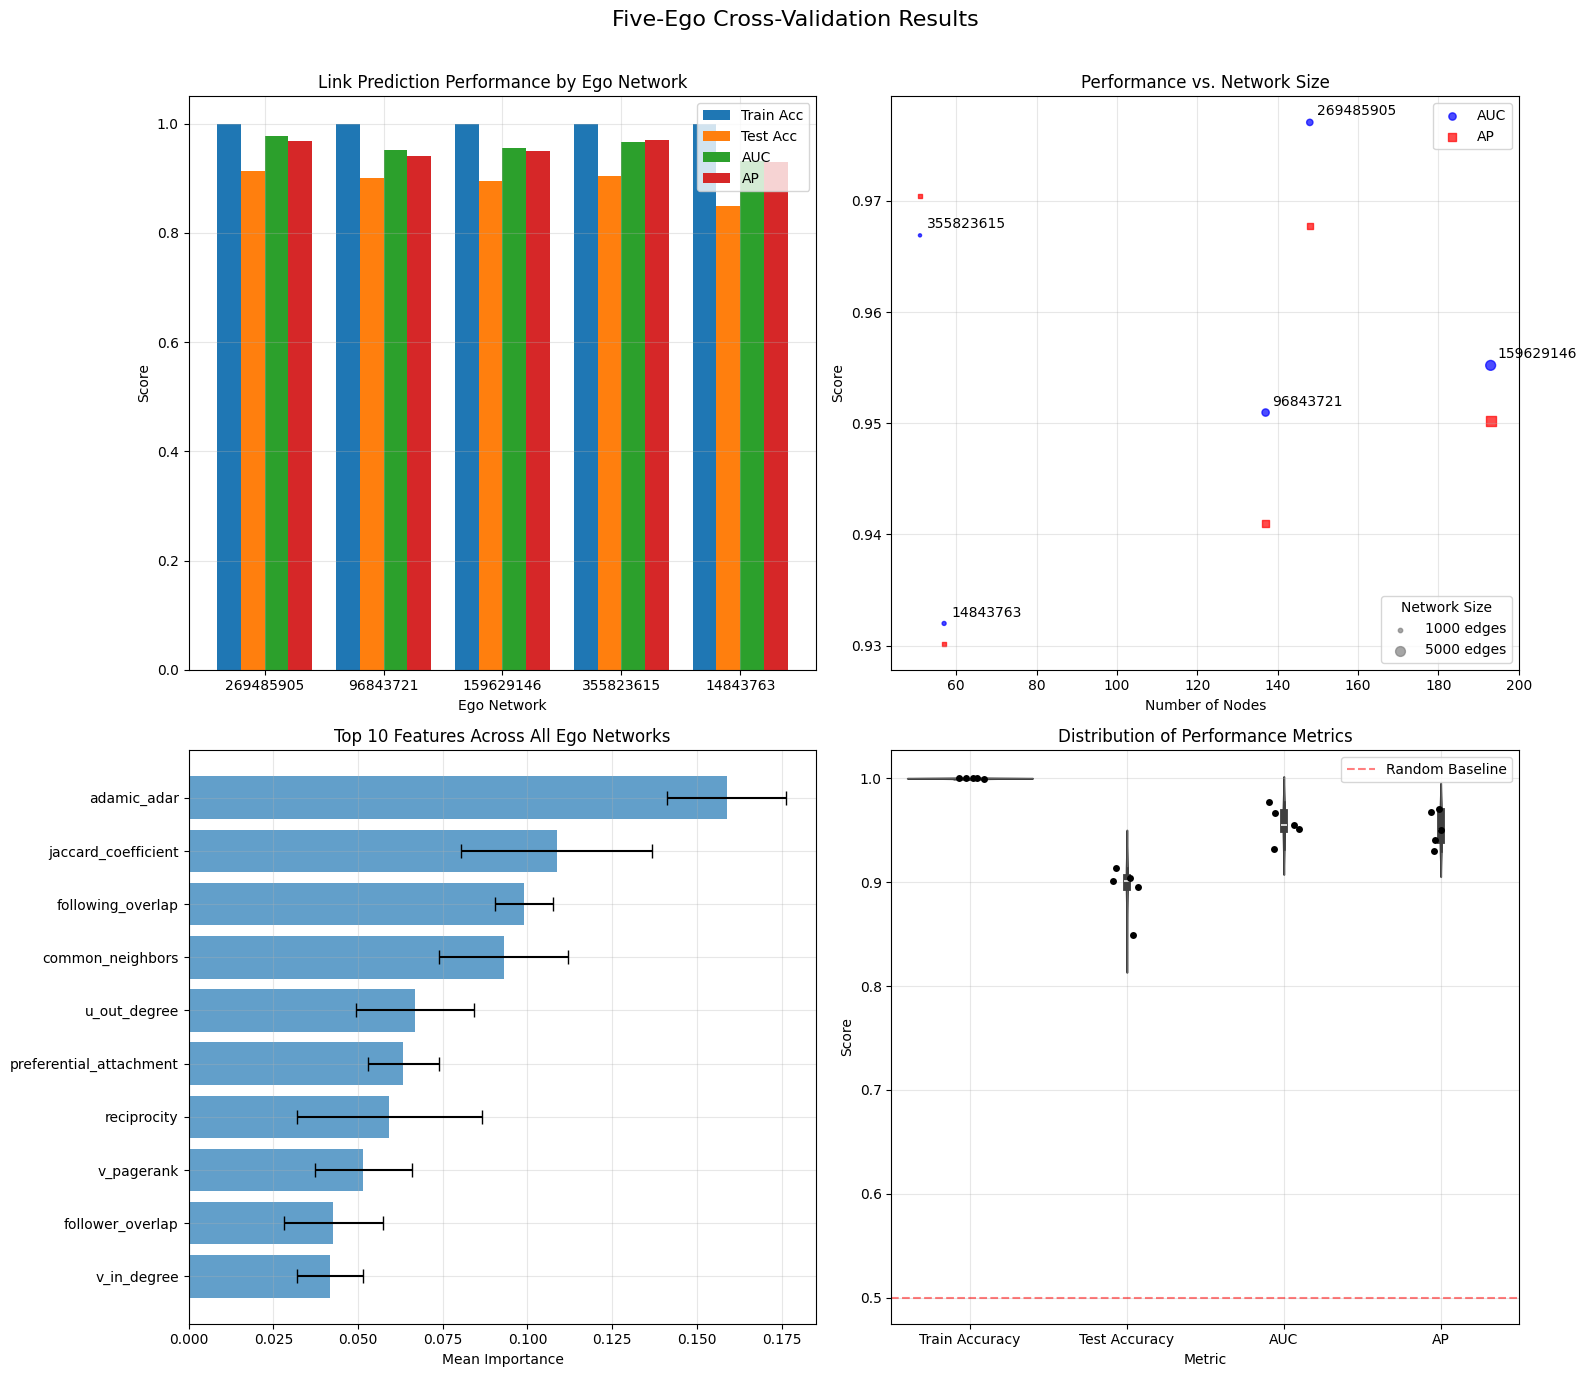

Report saved to cross_validation_report.md

=== Results Table (for report appendix) ===
|    ego_id |   nodes |   edges |   train_acc |   test_acc |   auc_score |   ap_score |   processing_time |
|----------:|--------:|--------:|------------:|-----------:|------------:|-----------:|------------------:|
| 269485905 |     148 |    2088 |    1        |   0.913876 |    0.977061 |   0.967731 |          32.9859  |
|  96843721 |     137 |    2762 |    0.999195 |   0.900722 |    0.950964 |   0.941001 |          43.0818  |
| 159629146 |     193 |    5046 |    1        |   0.89505  |    0.955206 |   0.950197 |         138.005   |
| 355823615 |      51 |     513 |    1        |   0.903846 |    0.966901 |   0.97044  |           1.7073  |
|  14843763 |      57 |     825 |    1        |   0.849398 |    0.931993 |   0.930175 |           4.23621 |
Appendix table saved to 'appendix_table.md'


In [ ]:
"""
Five-Ego Cross-Validation for Link Prediction
This script implements cross-validation across multiple ego networks
for evaluating link prediction performance.
"""

import os
import random
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import time
import urllib.request
import tarfile
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve

# -----------------------------------------------------------------------------
# Data Loading Functions
# -----------------------------------------------------------------------------

def download_data(url, extract_dir):
    """
    Download and extract the dataset if it doesn't exist already
    """
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)

    # Download the file
    tar_file_path = os.path.join(extract_dir, "ego-twitter.tar.gz")
    if not os.path.exists(tar_file_path):
        print(f"Downloading the dataset from {url}...")
        urllib.request.urlretrieve(url, tar_file_path)

    # Extract the file
    if not os.path.exists(os.path.join(extract_dir, "twitter")):
        print("Extracting the dataset...")
        with tarfile.open(tar_file_path, "r:gz") as tar:
            tar.extractall(extract_dir)

    print("Data download and extraction complete.")

def load_network(ego_id, data_dir):
    """
    Load the network data for a specific ego ID
    """
    # Path to edge file
    edge_file = os.path.join(data_dir, "twitter", f"{ego_id}.edges")

    # Create a directed graph (since Twitter follows are directed)
    G = nx.DiGraph()

    # Add edges from the edge file
    with open(edge_file, 'r') as f:
        for line in f:
            source, target = map(int, line.strip().split())
            G.add_edge(source, target)

    # Add the ego node (assumes ego follows everyone)
    ego_node = int(ego_id)
    # Create a copy of nodes before modifying the graph
    nodes = list(G.nodes())
    for node in nodes:
        G.add_edge(ego_node, node)

    # Load circles if available
    circles = {}
    circles_file = os.path.join(data_dir, "twitter", f"{ego_id}.circles")
    if os.path.exists(circles_file):
        with open(circles_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                circle_name = parts[0]
                circle_members = [int(x) for x in parts[1:]]
                circles[circle_name] = circle_members

    return G, circles

def load_features(ego_id, data_dir):
    """
    Load node features if available
    """
    features = {}
    feat_file = os.path.join(data_dir, "twitter", f"{ego_id}.feat")

    if os.path.exists(feat_file):
        # Load feature names if available
        feature_names = []
        featnames_file = os.path.join(data_dir, "twitter", f"{ego_id}.featnames")
        if os.path.exists(featnames_file):
            with open(featnames_file, 'r') as f:
                for line in f:
                    feature_names.append(line.strip().split()[1])

        # Load features
        with open(feat_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                node_id = int(parts[0])
                node_features = [int(x) for x in parts[1:]]
                features[node_id] = node_features

    return features, feature_names

def extract_topological_features(G):
    """
    Extract topological features for each node in the graph
    """
    # --- Centrality Measures ---
    degree_centrality = nx.degree_centrality(G)
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)

    # --- Influence Measures ---
    try:
        pagerank = nx.pagerank(G, alpha=0.85, max_iter=100)
    except:
        pagerank = {node: 0.0 for node in G.nodes()}

    # --- Structural Measures ---
    try:
        clustering = nx.clustering(G.to_undirected())
    except:
        clustering = {node: 0.0 for node in G.nodes()}

    # --- Combine All Features ---
    node_features = {}
    for node in G.nodes():
        node_features[node] = {
            'degree_centrality': degree_centrality.get(node, 0.0),
            'in_degree_centrality': in_degree_centrality.get(node, 0.0),
            'out_degree_centrality': out_degree_centrality.get(node, 0.0),
            'pagerank': pagerank.get(node, 0.0),
            'clustering': clustering.get(node, 0.0)
        }

    return node_features

def compute_edge_features(G, node_u, node_v, node_features):
    """
    Compute features for a potential edge between nodes u and v
    """
    # --- 1. Node-specific Features ---
    u_feats = node_features.get(node_u, {})
    v_feats = node_features.get(node_v, {})

    # --- 2. Topological Connection Features ---
    G_undirected = G.to_undirected()

    # Common neighbors
    try:
        common_neighbors = list(nx.common_neighbors(G_undirected, node_u, node_v))
        num_common_neighbors = len(common_neighbors)
    except:
        num_common_neighbors = 0

    # Preferential attachment
    pref_attachment = G_undirected.degree(node_u) * G_undirected.degree(node_v)

    # Jaccard coefficient
    try:
        u_neighbors = set(G_undirected.neighbors(node_u))
        v_neighbors = set(G_undirected.neighbors(node_v))
        if len(u_neighbors | v_neighbors) > 0:
            jaccard = len(u_neighbors & v_neighbors) / len(u_neighbors | v_neighbors)
        else:
            jaccard = 0.0
    except:
        jaccard = 0.0

    # --- 3. Directed Relationship Features ---
    try:
        u_successors = set(G.successors(node_u))
        u_predecessors = set(G.predecessors(node_u))
        v_successors = set(G.successors(node_v))
        v_predecessors = set(G.predecessors(node_v))

        reciprocity = 1.0 if node_u in v_successors else 0.0
        follower_overlap = len(u_predecessors & v_predecessors) / max(1, min(len(u_predecessors), len(v_predecessors)))
        following_overlap = len(u_successors & v_successors) / max(1, min(len(u_successors), len(v_successors)))
    except:
        reciprocity = 0.0
        follower_overlap = 0.0
        following_overlap = 0.0

    # Adamic-Adar index
    adamic_adar = 0.0
    try:
        for common_neighbor in common_neighbors:
            neighbor_degree = G_undirected.degree(common_neighbor)
            if neighbor_degree > 1:
                adamic_adar += 1.0 / np.log(neighbor_degree)
    except:
        pass

    # --- Combine All Features Into a Single Vector ---
    edge_features = {
        # Node features for source node (u)
        'u_degree': u_feats.get('degree_centrality', 0.0),
        'u_in_degree': u_feats.get('in_degree_centrality', 0.0),
        'u_out_degree': u_feats.get('out_degree_centrality', 0.0),
        'u_pagerank': u_feats.get('pagerank', 0.0),
        'u_clustering': u_feats.get('clustering', 0.0),

        # Node features for target node (v)
        'v_degree': v_feats.get('degree_centrality', 0.0),
        'v_in_degree': v_feats.get('in_degree_centrality', 0.0),
        'v_out_degree': v_feats.get('out_degree_centrality', 0.0),
        'v_pagerank': v_feats.get('pagerank', 0.0),
        'v_clustering': v_feats.get('clustering', 0.0),

        # Edge-specific topological features
        'common_neighbors': num_common_neighbors,
        'preferential_attachment': pref_attachment,
        'jaccard_coefficient': jaccard,
        'adamic_adar': adamic_adar,

        # Directed relationship features
        'reciprocity': reciprocity,
        'follower_overlap': follower_overlap,
        'following_overlap': following_overlap
    }

    return edge_features

# -----------------------------------------------------------------------------
# Data Preparation Functions
# -----------------------------------------------------------------------------

def prepare_link_prediction_data(G, test_ratio=0.1, neg_ratio=1.0):
    """
    Prepare data for link prediction by splitting existing edges into training and testing sets,
    and sampling non-existing edges as negative examples.

    Modified to use 10% test split as requested.
    """
    # Set random seed inside the function
    random_seed = 42

    # Extract all existing edges
    all_edges = list(G.edges())

    # Split edges into training and testing sets
    train_edges, test_edges = train_test_split(all_edges, test_size=test_ratio, random_state=random_seed)

    # Create a new graph with only training edges
    G_train = G.copy()
    G_train.remove_edges_from(test_edges)

    # Get all nodes for negative edge sampling
    nodes = list(G.nodes())

    # Helper function to sample negative edges (non-existing connections)
    def sample_non_edges(graph, num_samples, exclude_edges=None):
        if exclude_edges is None:
            exclude_edges = set()
        else:
            exclude_edges = set(exclude_edges)

        non_edges = []
        attempts = 0
        max_attempts = num_samples * 10  # Safety to prevent infinite loops

        # Keep sampling until the required number is reached
        while len(non_edges) < num_samples and attempts < max_attempts:
            attempts += 1
            # Randomly select two distinct nodes
            u, v = random.sample(nodes, 2)

            # Only add pair if conditions are met
            if u != v and not graph.has_edge(u, v) and (u, v) not in exclude_edges:
                non_edges.append((u, v))
                exclude_edges.add((u, v))

        return non_edges

    # Calculate how many negative edges to sample
    n_pos_train = len(train_edges)
    n_pos_test = len(test_edges)

    # Sample negative edges for training and testing sets
    train_non_edges = sample_non_edges(G, int(n_pos_train * neg_ratio))
    test_non_edges = sample_non_edges(G, int(n_pos_test * neg_ratio), exclude_edges=train_non_edges)

    return G_train, train_edges, test_edges, train_non_edges, test_non_edges

def create_edge_dataset(G, pos_edges, neg_edges, node_features):
    """
    Create a machine learning dataset for edge prediction
    """
    X = []  # Will hold feature vectors
    y = []  # Will hold labels

    # Process positive examples
    for u, v in pos_edges:
        edge_feats = compute_edge_features(G, u, v, node_features)
        X.append(list(edge_feats.values()))
        y.append(1)  # Positive class

    # Process negative examples
    for u, v in neg_edges:
        edge_feats = compute_edge_features(G, u, v, node_features)
        X.append(list(edge_feats.values()))
        y.append(0)  # Negative class

    return np.array(X), np.array(y)

# -----------------------------------------------------------------------------
# Cross-Validation Implementation
# -----------------------------------------------------------------------------

def run_cross_validation(data_dir, num_egos=5, test_ratio=0.1, random_seed=42):
    """
    Run cross-validation for link prediction across multiple ego networks

    Parameters:
    -----------
    data_dir : str
        Directory containing the dataset
    num_egos : int
        Number of ego networks to evaluate
    test_ratio : float
        Fraction of edges to hide for testing
    random_seed : int
        Random seed for reproducibility

    Returns:
    --------
    results_df : pandas.DataFrame
        DataFrame containing performance metrics for each ego network
    results : list
        Detailed results including feature importances
    """
    # Set random seed for reproducibility
    random.seed(random_seed)
    np.random.seed(random_seed)

    # Find available ego networks
    ego_networks = []
    for filename in os.listdir(os.path.join(data_dir, "twitter")):
        if filename.endswith(".edges"):
            ego_networks.append(filename.split(".")[0])

    print(f"Found {len(ego_networks)} ego networks")

    # If there are fewer networks than requested, use all available
    if len(ego_networks) < num_egos:
        print(f"Warning: Only {len(ego_networks)} ego networks available, using all of them.")
        selected_egos = ego_networks
    else:
        # Randomly select the requested number of ego networks
        selected_egos = random.sample(ego_networks, num_egos)

    print(f"Selected ego networks: {selected_egos}")

    # Initialize results storage
    results = []

    # For each selected ego network
    for ego_id in tqdm(selected_egos, desc="Processing ego networks"):
        try:
            print(f"\n--- Processing Ego Network {ego_id} ---")
            start_time = time.time()

            # Load the network
            G, circles = load_network(ego_id, data_dir)
            print(f"Network loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

            # Extract node features
            print("Extracting topological features...")
            node_features = extract_topological_features(G)

            # Split data with specified test ratio
            print(f"Splitting data with {test_ratio*100}% test ratio...")
            G_train, train_edges, test_edges, train_non_edges, test_non_edges = \
                prepare_link_prediction_data(G, test_ratio=test_ratio, neg_ratio=1.0)

            # Create datasets
            print("Creating feature vectors...")
            X_train, y_train = create_edge_dataset(G_train, train_edges, train_non_edges, node_features)
            X_test, y_test = create_edge_dataset(G_train, test_edges, test_non_edges, node_features)

            # Scale features
            print("Scaling features...")
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train the model (Random Forest with 100 trees)
            print("Training Random Forest model...")
            rf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
            rf.fit(X_train_scaled, y_train)

            # Get predictions
            y_train_pred = rf.predict(X_train_scaled)
            y_test_pred = rf.predict(X_test_scaled)
            y_test_proba = rf.predict_proba(X_test_scaled)[:, 1]

            # Calculate performance metrics
            train_acc = np.mean(y_train_pred == y_train)
            test_acc = np.mean(y_test_pred == y_test)
            auc_score = roc_auc_score(y_test, y_test_proba)
            ap_score = average_precision_score(y_test, y_test_proba)

            # Get feature names
            feature_names = list(compute_edge_features(G, list(G.nodes())[0], list(G.nodes())[1], node_features).keys())

            # Get feature importances
            importances = rf.feature_importances_

            # Store top 5 features
            indices = np.argsort(importances)[::-1]
            top_features = {feature_names[i]: importances[i] for i in indices[:5]}

            # Calculate elapsed time
            elapsed_time = time.time() - start_time

            # Store results
            ego_result = {
                'ego_id': ego_id,
                'nodes': G.number_of_nodes(),
                'edges': G.number_of_edges(),
                'train_samples': len(X_train),
                'test_samples': len(X_test),
                'train_acc': train_acc,
                'test_acc': test_acc,
                'auc_score': auc_score,
                'ap_score': ap_score,
                'feature_importance': dict(zip(feature_names, importances)),
                'top_features': top_features,
                'processing_time': elapsed_time
            }

            results.append(ego_result)

            # Print results
            print(f"\nResults for ego {ego_id}:")
            print(f"  Train accuracy: {train_acc:.4f}")
            print(f"  Test accuracy: {test_acc:.4f}")
            print(f"  AUC score: {auc_score:.4f}")
            print(f"  AP score: {ap_score:.4f}")
            print(f"  Processing time: {elapsed_time:.2f} seconds")
            print("\nTop 5 features:")
            for feature, importance in sorted(top_features.items(), key=lambda x: x[1], reverse=True):
                print(f"  - {feature}: {importance:.4f}")

        except Exception as e:
            print(f"Error processing ego {ego_id}: {str(e)}")
            import traceback
            traceback.print_exc()

    # Convert results to DataFrame
    results_df = pd.DataFrame([
        {
            'ego_id': r['ego_id'],
            'nodes': r['nodes'],
            'edges': r['edges'],
            'train_acc': r['train_acc'],
            'test_acc': r['test_acc'],
            'auc_score': r['auc_score'],
            'ap_score': r['ap_score'],
            'processing_time': r['processing_time']
        } for r in results
    ])

    # Calculate mean and standard deviation
    summary = {
        'mean_train_acc': results_df['train_acc'].mean(),
        'std_train_acc': results_df['train_acc'].std(),
        'mean_test_acc': results_df['test_acc'].mean(),
        'std_test_acc': results_df['test_acc'].std(),
        'mean_auc': results_df['auc_score'].mean(),
        'std_auc': results_df['auc_score'].std(),
        'mean_ap': results_df['ap_score'].mean(),
        'std_ap': results_df['ap_score'].std(),
    }

    # Print summary
    print("\n=== Cross-Validation Summary ===")
    print(f"Number of ego networks: {len(results_df)}")
    print(f"Mean Training Accuracy: {summary['mean_train_acc']:.4f} ± {summary['std_train_acc']:.4f}")
    print(f"Mean Testing Accuracy: {summary['mean_test_acc']:.4f} ± {summary['std_test_acc']:.4f}")
    print(f"Mean AUC: {summary['mean_auc']:.4f} ± {summary['std_auc']:.4f}")
    print(f"Mean AP: {summary['mean_ap']:.4f} ± {summary['std_ap']:.4f}")

    # Visualize results
    plot_cross_validation_results(results_df, results)

    # Create detailed report
    create_cross_validation_report(results_df, results)

    return results_df, results

def plot_cross_validation_results(results_df, results):
    """
    Visualize cross-validation results

    Parameters:
    -----------
    results_df : pandas.DataFrame
        DataFrame containing performance metrics
    results : list
        Original results list with detailed information
    """
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    # Plot 1: Performance metrics for each ego network
    ax = axes[0, 0]

    # Prepare data for grouped bar chart
    metrics = ['train_acc', 'test_acc', 'auc_score', 'ap_score']
    metric_labels = ['Train Acc', 'Test Acc', 'AUC', 'AP']
    x = np.arange(len(results_df))
    width = 0.2

    # Plot bars for each metric
    for i, metric in enumerate(metrics):
        ax.bar(x + width*(i-1.5), results_df[metric], width, label=metric_labels[i])

    ax.set_xlabel('Ego Network')
    ax.set_ylabel('Score')
    ax.set_title('Link Prediction Performance by Ego Network')
    ax.set_xticks(x)
    ax.set_xticklabels(results_df['ego_id'])
    ax.legend()
    ax.grid(alpha=0.3)

    # Plot 2: Network size vs. performance
    ax = axes[0, 1]

    # Create scatter plot
    sc1 = ax.scatter(results_df['nodes'], results_df['auc_score'],
                    s=results_df['edges']/100, label='AUC', alpha=0.7,
                    c='blue', marker='o')
    sc2 = ax.scatter(results_df['nodes'], results_df['ap_score'],
                    s=results_df['edges']/100, label='AP', alpha=0.7,
                    c='red', marker='s')

    # Add ego IDs as labels
    for i, ego_id in enumerate(results_df['ego_id']):
        ax.annotate(ego_id,
                   (results_df['nodes'][i], results_df['auc_score'][i]),
                   xytext=(5, 5), textcoords='offset points')

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Score')
    ax.set_title('Performance vs. Network Size')
    ax.legend()
    ax.grid(alpha=0.3)

    # Add size reference for the scatter points
    handles, labels = ax.get_legend_handles_labels()
    legend1 = ax.legend(handles, labels, loc="upper right")

    # Add second legend for the sizes
    max_edges = results_df['edges'].max()
    sizes = [1000, 5000, 10000]
    size_handles = []

    for size in sizes:
        if size <= max_edges:
            size_handles.append(plt.scatter([], [], s=size/100, c='gray', alpha=0.7))

    if size_handles:
        size_labels = [f"{size} edges" for size in sizes if size <= max_edges]
        ax.add_artist(legend1)
        ax.legend(handles=size_handles, labels=size_labels, loc="lower right", title="Network Size")

    # Plot 3: Top features importance across networks
    ax = axes[1, 0]

    # Collect top features
    all_top_features = {}
    for r in results:
        for feature, importance in r['feature_importance'].items():
            if feature not in all_top_features:
                all_top_features[feature] = []
            all_top_features[feature].append(importance)

    # Calculate mean importance for each feature
    feature_importance = {f: np.mean(v) for f, v in all_top_features.items()}
    feature_std = {f: np.std(v) for f, v in all_top_features.items()}

    # Sort by mean importance
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    feature_names = [f[0] for f in sorted_features[:10]]  # Top 10 features
    importances = [feature_importance[f] for f in feature_names]
    stds = [feature_std[f] for f in feature_names]

    # Create horizontal bar chart with error bars
    y_pos = np.arange(len(feature_names))
    ax.barh(y_pos, importances, xerr=stds, align='center', alpha=0.7, capsize=5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_names)
    ax.invert_yaxis()  # Labels read top-to-bottom
    ax.set_xlabel('Mean Importance')
    ax.set_title('Top 10 Features Across All Ego Networks')
    ax.grid(alpha=0.3)

    # Plot 4: Performance distribution
    ax = axes[1, 1]

    # Create dataframe for easier plotting
    metrics_df = pd.DataFrame({
        'Train Accuracy': results_df['train_acc'],
        'Test Accuracy': results_df['test_acc'],
        'AUC': results_df['auc_score'],
        'AP': results_df['ap_score']
    })

    # Melt for seaborn
    melted_df = pd.melt(metrics_df, var_name='Metric', value_name='Score')

    # Create violin plot
    sns.violinplot(x='Metric', y='Score', data=melted_df, ax=ax, inner='box')

    # Add individual points
    sns.stripplot(x='Metric', y='Score', data=melted_df, color='black', size=5, ax=ax, jitter=True)

    ax.set_title('Distribution of Performance Metrics')
    ax.grid(alpha=0.3)

    # Add horizontal line at 0.5 (random baseline)
    ax.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='Random Baseline')
    ax.legend()

    # Add title to the figure
    plt.suptitle('Five-Ego Cross-Validation Results', fontsize=16)

    # Adjust layout and save
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for the suptitle
    plt.savefig("cross_validation_results.png", dpi=300, bbox_inches='tight')
    plt.show()

def create_cross_validation_report(results_df, results, output_file="cross_validation_report.md"):
    """
    Create a detailed report of cross-validation results

    Parameters:
    -----------
    results_df : pandas.DataFrame
        DataFrame containing performance metrics
    results : list
        Original results list with detailed information
    output_file : str
        Output markdown file path
    """
    with open(output_file, 'w') as f:
        # Write header
        f.write("# Link Prediction Cross-Validation Report\n\n")

        # Summary statistics
        f.write("## Summary Statistics\n\n")
        f.write(f"- **Number of ego networks evaluated**: {len(results_df)}\n")
        f.write(f"- **Mean Training Accuracy**: {results_df['train_acc'].mean():.4f} ± {results_df['train_acc'].std():.4f}\n")
        f.write(f"- **Mean Testing Accuracy**: {results_df['test_acc'].mean():.4f} ± {results_df['test_acc'].std():.4f}\n")
        f.write(f"- **Mean AUC**: {results_df['auc_score'].mean():.4f} ± {results_df['auc_score'].std():.4f}\n")
        f.write(f"- **Mean AP**: {results_df['ap_score'].mean():.4f} ± {results_df['ap_score'].std():.4f}\n\n")

        # Results table
        f.write("## Performance by Ego Network\n\n")
        f.write("| Ego ID | Nodes | Edges | Train Acc | Test Acc | AUC | AP | Time (s) |\n")
        f.write("|--------|-------|-------|-----------|----------|-----|----|---------|\n")

        for _, row in results_df.iterrows():
            f.write(f"| {row['ego_id']} | {row['nodes']} | {row['edges']} | " +
                   f"{row['train_acc']:.4f} | {row['test_acc']:.4f} | " +
                   f"{row['auc_score']:.4f} | {row['ap_score']:.4f} | {row['processing_time']:.1f} |\n")

        f.write("\n")

        # Feature importance analysis
        f.write("## Feature Importance Analysis\n\n")

        # Collect top features across all networks
        all_features = {}
        for r in results:
            for feature, importance in r['feature_importance'].items():
                if feature not in all_features:
                    all_features[feature] = []
                all_features[feature].append(importance)

        # Calculate statistics for each feature
        feature_stats = {}
        for feature, values in all_features.items():
            feature_stats[feature] = {
                'mean': np.mean(values),
                'std': np.std(values),
                'count': len(values)
            }

        # Sort by mean importance
        sorted_features = sorted(feature_stats.items(), key=lambda x: x[1]['mean'], reverse=True)

        # Create feature table
        f.write("### Most Important Features Across All Networks\n\n")
        f.write("| Feature | Mean Importance | Std Dev | Count |\n")
        f.write("|---------|-----------------|---------|-------|\n")

        for feature, stats in sorted_features[:10]:  # Top 10 features
            f.write(f"| {feature} | {stats['mean']:.4f} | {stats['std']:.4f} | {stats['count']}/{len(results_df)} |\n")

        f.write("\n")

        # Individual ego network details
        f.write("## Individual Network Results\n\n")

        for r in results:
            f.write(f"### Ego Network {r['ego_id']}\n\n")
            f.write(f"- **Nodes**: {r['nodes']}\n")
            f.write(f"- **Edges**: {r['edges']}\n")
            f.write(f"- **Training Accuracy**: {r['train_acc']:.4f}\n")
            f.write(f"- **Testing Accuracy**: {r['test_acc']:.4f}\n")
            f.write(f"- **AUC Score**: {r['auc_score']:.4f}\n")
            f.write(f"- **AP Score**: {r['ap_score']:.4f}\n")
            f.write(f"- **Processing Time**: {r['processing_time']:.1f} seconds\n\n")

            f.write("#### Top 5 Features:\n\n")
            for feature, importance in sorted(r['top_features'].items(), key=lambda x: x[1], reverse=True):
                f.write(f"- {feature}: {importance:.4f}\n")

            f.write("\n")

    print(f"Report saved to {output_file}")

# -----------------------------------------------------------------------------
# Main Function
# -----------------------------------------------------------------------------

def main():
    """
    Main function to run the five-ego cross-validation
    """
    # URL of the dataset
    url = "https://snap.stanford.edu/data/twitter.tar.gz"
    data_dir = "./data"

    # Download and extract the dataset if it doesn't exist
    if not os.path.exists(os.path.join(data_dir, "twitter")):
        download_data(url, data_dir)

    # Settings for cross-validation
    num_egos = 5        # Number of ego networks to evaluate
    test_ratio = 0.1    # Hide 10% of edges as requested
    random_seed = 42    # For reproducibility

    # Run the cross-validation
    results_df, results = run_cross_validation(
        data_dir,
        num_egos=num_egos,
        test_ratio=test_ratio,
        random_seed=random_seed
    )

    # Print results table for the report appendix
    print("\n=== Results Table (for report appendix) ===")
    print(results_df.to_markdown(index=False))

    # Also save as CSV for easier analysis
    results_df.to_csv("cross_validation_results.csv", index=False)

    # Create a simple appendix table in markdown format
    with open("appendix_table.md", "w") as f:
        f.write("# Appendix: Link Prediction Performance Across Ego Networks\n\n")
        f.write("The table below shows link prediction performance metrics across multiple ego networks.\n\n")
        f.write("|" + "|".join(results_df.columns) + "|\n")
        f.write("|" + "|".join(["---"] * len(results_df.columns)) + "|\n")

        for _, row in results_df.iterrows():
            f.write("| " + " | ".join([str(row[col]) if not isinstance(row[col], float)
                                    else f"{row[col]:.4f}" for col in results_df.columns]) + " |\n")

        f.write(f"\nMean AUC: {results_df['auc_score'].mean():.4f} ± {results_df['auc_score'].std():.4f}\n")
        f.write(f"Mean AP: {results_df['ap_score'].mean():.4f} ± {results_df['ap_score'].std():.4f}\n")

    print("Appendix table saved to 'appendix_table.md'")

if __name__ == "__main__":
    main()